# Build database

## Import

In [1]:
import pandas as pd
from astroquery.mast import Catalogs
import lightkurve as lk
import numpy as np

## Load datasets

In [2]:
# Open Exoplanet Catalogue
url = "https://raw.githubusercontent.com/OpenExoplanetCatalogue/oec_tables/master/comma_separated/open_exoplanet_catalogue.txt"
oec_df = pd.read_csv(url)
oec_df.head()

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list
0,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.1450,+40 13 14.7985,134.833,0.52,0.50,0.07,3687.0,NaN,Controversial
1,Kepler-974 b,0,NaN,0.140,4.194497,0.0390,NaN,NaN,NaN,NaN,...,17/11/28,19 00 03.1450,+40 13 14.7985,134.833,0.52,0.50,0.07,3687.0,NaN,Confirmed planets
2,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.1450,+40 13 14.7985,134.833,0.52,0.50,0.07,3687.0,NaN,Controversial
3,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,15/12/03,19 02 17.7544,+38 24 03.1772,650.000,1.07,1.02,0.12,5777.0,NaN,Confirmed planets
4,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,15/12/03,19 02 17.7544,+38 24 03.1772,650.000,1.07,1.02,0.12,5777.0,NaN,Confirmed planets


In [37]:
# exoplanet.eu catalogue
url = "http://exoplanet.eu/catalog/csv/"
eeu_df = pd.read_csv(url)
eeu_df.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,19.40,1.50,1.50,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,10.50,2.47,2.47,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,5.33,0.57,0.57,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,4.64,0.19,0.19,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


In [22]:
oec_df.loc[(~oec_df.name.isnull()) & (oec_df.name.str.contains("ctl"))]

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list


In [18]:
# Count word occurrence in productName column (excluding collection: e.g. W16 or S15)
word_occurrence = oec_df.name.str.lower().str.replace(r"[.,;]*", "", regex=True).str.replace(r"\d*", "", regex=True).str.replace("-", " ").str.split(' ', expand=True).stack().value_counts()

# Convert series to a DataFrame and name column as "word_occurence"
word_occurrence = word_occurrence.to_frame(name="word_occurrence")
word_occurrence

,word_occurrence
,4471
b,3347
kepler,2334
c,778
hd,623
...,...
uscoctio,1
sr,1
jupiter,1
cfbdsir,1


In [20]:
print(word_occurrence.index.to_list())

['', 'b', 'kepler', 'c', 'hd', 'k', 'd', 'wasp', 'blg', 'l', 'e', 'epic', 'a', 'ogle', 'toi', 'hats', 'koi', 'gj', 'hat', 'p', 'hip', 'gliese', 'f', 'corot', 'moa', 'kic', 'kmt', 'tau', 'kelt', '(ab)', 'ngts', 'g', 'bd+', 'xo', 'qatar', 'tr', 'hr', 'j', 'vir', 'tyc', 'psr', '+', 'cet', 'trappist', 'ceti', 'cancri', 'h', 'bd', 'm', 'v', 'dmpp', 'mass', 'uma', 'mu', 'tres', 'lhs', 'centauri', 'arae', 'upsilon', 'andromedae', 'beta', 'ab', 'gamma', 'ltt', 'wolf', 'oph', 'ph', 'pic', 'lkca', 'yz', 'hu', 'eps', 'j+', 'ybp', 'mascara', 'aqr', 'peg', 'coronae', 'nu', 'leonis', 'pr', 'borealis', 'lp', 'proxima', 'a(ab)', 'ngc', 'sand', 'eta', 'leo', 'ursae', 'boo', 'bin', 'rho', 'pds', 'sex', 'usco', 'sweeps', 'gat', 'ucf', 'her', 'crb', 'minoris', 'alf', 'wendelstein', 'roxs', 'kapteyn', 'cma', 'wts', 'omi', 'n', 'and', 'ny', 's', 'ross', 'draconis', 'wd', 'alpha', 'lyr', 'nn', 'gl', 'ari', 'kappa', 'ser', 'i', 'aql', 'psi', 'psc', 'indi', 'gu', 'iota', 'lyn', 'no', 'j+l', 'mercury', 'vhs', '

### Naming convention ([source](https://en.wikipedia.org/wiki/Kepler_object_of_interest))
Stars observed by Kepler that are considered candidates for transit events are given the designation "KOI" followed by an integer number. For each set of periodic transit events associated with a particular KOI, a two-digit decimal is added to the KOI number for that star. For example the first transit event candidate identified around the star KOI 718 is designated KOI 718.01, while the second candidate is KOI 718.02 and the third is KOI 718.03. Once a transit candidate is verified to be a planet (see below), the star is designated "Kepler" followed by a hyphen and an integer number. The associated planet(s) have the same designation, followed by a letter in the order each was discovered.

* Kepler
* KIC: The catalog alone is not used for finding Kepler targets, because only a portion (about 1/3 of the catalog) can be observed by the spacecraft. The full catalog includes up to 21 magnitude, giving 13.2 million targets, but of these only about 6.5 to 4.5 million fall on Kepler's sensors.
* KOI: Kepler Objects of Interest: star observed by Kepler, suspected of hosting 1 or more transiting planets. KOIs come from a master list of 150,000 stars, which itself is generated from the Kepler Input Catalog (KIC). A KOI shows a periodic dimming, indicative of an unseen planet passing between the star and Earth, eclipsing part of the star. However, such an observed dimming is not a guarantee of a transiting planet, because other astronomical objects—such as an eclipsing binary in the background—can mimic a transit signal => the majority of KOIs are as yet not confirmed transiting planet systems.
* EPIC: The Ecliptic Plane Input Catalog: publicly searchable database of stars and planets that is associated with the K2 "Second Light" plan of the Kepler space telescope mission
* TIC: TESS Input Catalog
* TOI: TESS Objects of
Interest Catalog: includes both new planet candidates found by TESS and previously known planets recovered by TESS observations. [csv file](https://archive.stsci.edu/missions/tess/catalogs/toi/tois.csv)
* TCE: A Threshold-Crossing Event (TCE) is a sequence of transit-like features in the flux time series of a given target that resembles the signature of a transiting planet to a sufficient degree that the target is passed on for further analysis [source](https://exoplanetarchive.ipac.caltech.edu/docs/API_tce_columns.html) | [list of csv files](https://archive.stsci.edu/tess/tic_ctl.html)
* CTL: The Candidate Target List (CTL)
= subset of the TIC: set of targets selected as likely good targets for transit detection and consists of two main components.

    * All TIC stars brighter than TESS magnitude = 13, and an estimated stellar radii smaller than R⊙ (sun).
    * All stars included in the curated Cool Dwarf Catalog (CDC).

The CTL is a list of ~9.5 million stars, each evaluated according to a metric that prioritizes the star for transit detection, which incorporate the T-mag, stellar radius, estimated flux contamination, and number of sectors of observation. 
To search the CTL data please go to the MAST Portal as above, select MAST Catalogs as the collection and then TESS CTL v8.01 as the Mission.
For more information on the TIC and CTL please visit the [MIT](https://tess.mit.edu/science/tess-input-catalogue/) page.

In [ ]:
# Count word occurrence in productName column (excluding collection: e.g. W16 or S15)
# word_occurrence = oec_df.name.str.lower().str.replace(r"[WwSs]\d{2}", "", regex=True).str.replace(".", "").str.replace(",", "").str.split(' ', expand=True).stack().value_counts()

# Convert series to a DataFrame and name column as "word_occurence"
# word_occurrence = word_occurrence.to_frame(name="word_occurrence")

## Missing values

In [4]:
oec_df.loc[oec_df.name.isnull()].T

,1943
name,NaN
binaryflag,0
mass,0.01517
radius,0.1909
period,6.2682
semimajoraxis,0.06839
eccentricity,0.0
periastron,NaN
longitude,NaN
ascendingnode,NaN


In [42]:
target_name = "HD 209458"
search_radius_deg = 0.2
catalog_data = Catalogs.query_object(target_name, radius=search_radius_deg, catalog="Ctl")
catalog_data[:10]

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
str9,str8,int64,str12,str10,str16,str19,str19,str19,str8,int64,str4,str7,float64,float64,str7,float64,float64,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str1,str1,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str5,float64,float64,float64,float64,int64,str1,str8,str8,str15,float64,float64,float64,float64,float64,float64,int64,int64,float64
420814525,20190415,108859,1688-01821-1,545-143615,22031077+1853036,--,J220310.79+185303.3,1779546757669063552,44767131,--,STAR,tmgaia2,330.794887332661,18.8843189579296,tmgaia2,29.5787,0.0829465,-17.8904,0.0752507,gaia2,20.6745,0.0526252,gaia2,76.7533286142829,-28.5269064049666,340.354110722861,28.724204741958,8.168,0.0,7.65,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.591,0.02,6.366,0.038,6.308,0.026,AAA-111-111-000-0-0,nan,6.308,0.091,6.191,0.027,6.32,0.016,6.265,0.053,7.50866,0.000406,7.1274,0.0061,gbprp,spect,6052.0,100.638,4.34258,0.0746529,0.05,0.1,1.18655,0.0453267,1.13,0.152342,0.676434,0.134476,DWARF,1.70160615,0.053652,48.3016,0.1237,0.0,0.0,108,0.00205775979,--,--,0.00532769497617041,0.0,0.0,--,0.126458,0.178227,0.0461432,0.0445101,0.120767,0.148185,0.0746832,0.0746227,0.0475144,0.0597896,0.1234,0.124,bj2018,99.2933,101.982,spect,7.81271,0.001598,7.08965,0.00346,1,--,hipvmag,apassdr9,planetcandidate,1.30421800301715,1.16724435120408,330.795021930251,18.8842419298663,0.0481609399806373,0.0447596284346098,1,0,5.35583515687783e-07
420814510,20190415,--,1688-01903-1,545-143610,22030745+1851343,1237680272035283149,J220307.44+185134.1,1779540774778606976,44767053,--,STAR,tmgaia2,330.781068927894,18.8595170828528,tmgaia2,-13.3257,0.121134,-9.80113,0.102114,gaia2,2.14492,0.0869777,gaia2,76.723237195486,-28.5362440832351,340.329224346305,28.7066053274685,11.634,0.223,11.301,0.016,14.3481,0.00622708,13.5767,0.00769571,8.24238,7.98801e-05,13.0644,0.00912818,13.0657,0.0149484,10.222,0.026,9.991,0.032,9.912,0.018,AAA-222-111-000-0-0,nan,9.905,0.024,9.931,0.021,9.873,0.05,8.713,0.441,11.095,0.000725,10.7418,0.007,rered,gaia2,6500.0,126.83,3.95973,0.0938827,nan,nan,2.00029,0.117927,1.33,0.212628,0.166177,0.0422949,DWARF,6.434799,0.5858035,460.887,18.649,0.0519725,0.00483036,102,0.214575276,--,--,0.000442758432195196,0.00602616,0.00363456,panstarrs,0.177862,0.247393,0.149764,0.0860899,0.0303173,0.0542726,0.0907797,0.0969856,0.514748,0.656859,17.909,19.389,bj2018,130.633,123.028,dered,11.3638,0.002083,10.692,0.000844,1,--,tycho2v3,tycho2b3,planetcandidate,1.90516243454267,1.58390345975328,330.781008298396,18.8594748835525,0.0843157527216912,0.0599899452359198

In [43]:
# import numpy as np
np.where(catalog_data['ID'] == '372974978')[0]

array([5])

In [26]:
import lightkurve as lk

In [46]:
lk.search_targetpixelfile("330.794887332661 18.8843189579296")

No data found for target "330.794887332661 18.8843189579296".


SearchResult containing 0 data products.

In [34]:
import exodata
exocat = exodata.load_db_from_url()

rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus


In [123]:
# target_id = "212779596"
target_id = "240968774"
# target_id = "209458" # alternate TIC "TIC 420814525" but not found

# To search for planets associated with this target star id
planets = exocat.searchPlanet('target_id')
# planets = exocat.searchPlanet('212779596')
print(planets)

False


In [124]:
oec_df.loc[(~oec_df.name.isnull()) & (oec_df.name.str.contains(target_id))]

,name,binaryflag,mass,radius,period,semimajoraxis,eccentricity,periastron,longitude,ascendingnode,...,lastupdate,system_rightascension,system_declination,system_distance,hoststar_mass,hoststar_radius,hoststar_metallicity,hoststar_temperature,hoststar_age,list


In [125]:
name_condition = (eeu_df['# name'].str.contains(target_id)) & (eeu_df['# name'].notna())
alter_name_condition = (eeu_df['star_alternate_names'].str.contains(target_id)) & (eeu_df['star_alternate_names'].notna())
eeu_df.loc[name_condition | alter_name_condition]

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names


In [55]:
df = pd.read_csv("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/tess2021066093107-s0036-s0036_dvr-tcestats.csv",comment='#')
df.head()

,tceid,ticid,tce_plnt_num,sectors,lastUpdate,tce_period,tce_period_err,tce_time0bt,tce_time0bt_err,tce_time0,...,tce_dicco_mdec,tce_dicco_mdec_err,tce_dicco_msky,tce_dicco_msky_err,tce_ditco_mra,tce_ditco_mra_err,tce_ditco_mdec,tce_ditco_mdec_err,tce_ditco_msky,tce_ditco_msky_err
0,00000990903-01,990903,1,s0036,2021-04-26,11.596100,0.003515,2292.46,0.005268,2459292.46,...,-92.079090,9.208994,177.237600,8.579051,154.960400,8.333995,-89.930280,9.208991,179.165200,8.562875
1,00000990903-02,990903,2,s0036,2021-04-26,6.277950,0.003515,2286.77,0.005268,2459286.77,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
2,00001538794-01,1538794,1,s0036,2021-04-26,0.205701,0.003515,2280.95,0.005268,2459280.95,...,-0.281897,2.500009,0.301951,2.500009,-0.291555,2.500008,0.203391,2.500007,0.355488,2.500008
3,00001538794-02,1538794,2,s0036,2021-04-26,4.741660,0.003515,2282.93,0.005268,2459282.93,...,-0.021725,2.525413,0.453398,2.532378,0.270227,2.532391,0.500858,2.525410,0.569106,2.526986
4,00003129778-01,3129778,1,s0036,2021-04-26,0.343908,0.003515,2281.22,0.005268,2459281.22,...,-12.651650,2.755559,20.159270,2.690445,16.075300,2.646576,-14.930490,2.755556,21.939340,2.697595


In [94]:
toi = pd.read_csv("https://archive.stsci.edu/missions/tess/catalogs/toi/tois.csv", comment="#")
toi.head()

,Source Pipeline,TIC,Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TMag Value,TMag Uncertainty,Epoch Value,Epoch Error,...,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated
0,spoc,176860064,1457.01,PC,354.836680,45.719897,7.1140,0.006000,1766.359365,0.001300,...,NaN,3.0,4.0,3.0,3.0,4.0,4.0,4.0,2019-12-05 16:42:06+0000,2019-12-05 16:42:06+0000
1,spoc,236887394,1465.01,KP,303.381740,65.162081,11.8478,0.006100,1766.006734,0.000080,...,False,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2019-12-05 16:42:06+0000,2020-09-11 14:14:29+0000
2,spoc,427654774,1474.01,PC,349.287339,70.190021,14.1431,0.007508,1765.042474,0.003388,...,NaN,2.0,4.0,2.0,2.0,4.0,4.0,4.0,2019-12-05 16:42:06+0000,2019-12-05 16:42:06+0000
3,spoc,237086564,1466.01,PC,307.395886,61.550433,11.0278,0.006000,1766.253229,0.001272,...,False,1.0,4.0,1.0,1.0,4.0,4.0,4.0,2019-12-05 16:42:06+0000,2020-09-23 11:19:07+0000
4,spoc,240968774,1467.01,PC,19.113929,49.233780,10.5977,0.007301,1766.983728,0.002812,...,NaN,3.0,4.0,3.0,3.0,4.0,4.0,4.0,2019-12-05 16:42:06+0000,2019-12-05 16:42:06+0000


In [98]:
toi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Source Pipeline                           2657 non-null   object 
 1   TIC                                       2657 non-null   int64  
 2   Full TOI ID                               2657 non-null   float64
 3   TOI Disposition                           2657 non-null   object 
 4   TIC Right Ascension                       2657 non-null   float64
 5   TIC Declination                           2657 non-null   float64
 6   TMag Value                                2657 non-null   float64
 7   TMag Uncertainty                          2655 non-null   float64
 8   Epoch Value                               2657 non-null   float64
 9   Epoch Error                               2637 non-null   float64
 10  Orbital Period Value                

In [93]:
# load header
ctl_header = pd.read_csv("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/exo_CTL_08.01_header.csv")
ctl_header

# load CTL dataset
ctl = pd.read_csv("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/exo_CTL_08.01.csv", comment="#", names=ctl_header.columns)
ctl.head()

,[ID]:Integer,[priority]:Float,[splists]:String,[objID]:Integer
0,80423805,0.000192,planetcandidate,80
1,80423930,0.000100,cooldwarfs_v8,92
2,80423934,0.000116,cooldwarfs_v8,93
3,80424035,0.000417,planetcandidate,98
4,80424100,0.000096,cooldwarfs_v8,104


In [114]:
ctl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488282 entries, 0 to 9488281
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   [ID]:Integer      int64  
 1   [priority]:Float  float64
 2   [splists]:String  object 
 3   [objID]:Integer   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 289.6+ MB


In [116]:
ctl[ctl["[ID]:Integer"] == 240968774]

,[ID]:Integer,[priority]:Float,[splists]:String,[objID]:Integer
251843,240968774,0.004529,cooldwarfs_v8,18085528


In [115]:
toi[toi.TIC == 240968774]

,Source Pipeline,TIC,Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TMag Value,TMag Uncertainty,Epoch Value,Epoch Error,...,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated
4,spoc,240968774,1467.01,PC,19.113929,49.23378,10.5977,0.007301,1766.983728,0.002812,...,NaN,3.0,4.0,3.0,3.0,4.0,4.0,4.0,2019-12-05 16:42:06+0000,2019-12-05 16:42:06+0000


In [100]:
from astroquery.mast import Tesscut
sector_table = Tesscut.get_sectors(objectname="TIC 80423805")
print(sector_table)

ResolverError: Could not resolve 80423805 to a sky position.

In [126]:
search_result = lk.search_lightcurve("TIC 240968774")
# search_result = lk.search_lightcurve("TIC 80423805")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,SPOC,120,240968774,0.0
1,TESS Sector 17,2019,TESS-SPOC,1800,240968774,0.0
2,TESS Sector 17,2019,QLP,1800,240968774,0.0
3,TESS Sector 18,2019,SPOC,120,240968774,0.0
4,TESS Sector 18,2019,TESS-SPOC,1800,240968774,0.0
5,TESS Sector 18,2019,QLP,1800,240968774,0.0


In [118]:
help(search_result)

Help on SearchResult in module lightkurve.search object:

class SearchResult(builtins.object)
 |  SearchResult(table=None)
 |  
 |  Container for the results returned by the search functions.
 |  
 |  The purpose of this class is to provide a convenient way to inspect and
 |  download products that have been identified using one of the data search
 |  functions.
 |  
 |  Parameters
 |  ----------
 |  table : `~astropy.table.Table` object
 |      Astropy table returned by a join of the astroquery `Observations.query_criteria()`
 |      and `Observations.get_product_list()` methods.
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      Implements indexing and slicing, e.g. SearchResult[2:5].
 |  
 |  __init__(self, table=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |      Returns the number of products in the SearchResult table.
 |  
 |  __repr__(self, html=False)
 |      Return repr(self).
 |  
 |  download(self, q

In [107]:
help(lk.search_lightcurve)

Help on function search_lightcurve in module lightkurve.search:

search_lightcurve(target, radius=None, exptime=None, cadence=None, mission=('Kepler', 'K2', 'TESS'), author=None, quarter=None, month=None, campaign=None, sector=None, limit=None)
    Search the `MAST data archive <https://archive.stsci.edu>`_ for light curves.
    
    This function fetches a data table that lists the Light Curve Files
    that fall within a region of sky centered around the position of `target`
    and within a cone of a given `radius`. If no value is provided for `radius`,
    only a single target will be returned.
    
    Parameters
    ----------
    target : str, int, or `astropy.coordinates.SkyCoord` object
        Target around which to search. Valid inputs include:
    
            * The name of the object as a string, e.g. "Kepler-10".
            * The KIC or EPIC identifier as an integer, e.g. 11904151.
            * A coordinate string in decimal format, e.g. "285.67942179 +50.24130576".
   

In [136]:
search_result = lk.search_lightcurve("TIC 176860064")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,SPOC,120,176860064,0.0
1,TESS Sector 17,2019,TESS-SPOC,1800,176860064,0.0
2,TESS Sector 17,2019,QLP,1800,176860064,0.0


In [36]:
def download_lightcurve(target_name: str) -> lk.lightcurve.TessLightCurve:
    """
    Function to download the light curve of a target.
    In case the search returns multiple data products:
    it downloads the data with biggest exposure time and most recently observed
    """
    # search for light curves
    search_result = lk.search_lightcurve(target_name)

    try:
        # get max Exposure time
        exptime_max = np.max(search_result.exptime)

        # get data products with biggest exposure time
        exptime_max_result = search_result[search_result.exptime == exptime_max]

        # get index of most recent observation
        most_recent_idx = np.argmax(exptime_max_result.year)

        # get data product
        return exptime_max_result[most_recent_idx].download()
    except:
        return None

def get_lightcurve_list(target_list: list) -> pd.DataFrame:
    """
    Function to download lightcurves from a list of targets
    """
    # create empty list
    lc_list: list = []

    for target in target_list:

        # download lightcurve if found
        lc = download_lightcurve(target)

        # if lightcurve downloaded
        if lc:

            # preprocess lc
            pipeline_lightcurve

            # append to list
            lc_list.append(lc)
    
    return lc_df

def pipeline_lightcurve(lc):
    """
    function to preprocess 
    * a light curve
    """
    # remove missing values & outliers
    lc = lc.remove_nans().remove_outliers()
    
    # flatten lc
    flat_lc = lc.flatten()

    # compute best fit period
    periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.001))
    best_fit_period = periodogram.period_at_max_power

    # fold lc according to best fit period
    folded_lc = flat_lc.fold(period=best_fit_period)

    # return a tuple
    return (folded_lc, best_fit_period)

<class 'lightkurve.lightcurve.TessLightCurve'>


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

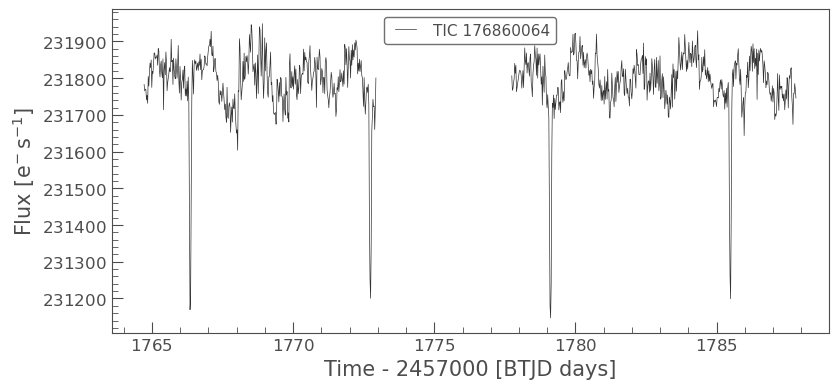

In [157]:
lc = download_lightcurve("TIC 176860064")
print(type(lc))
lc.plot()

6.375000000000005 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

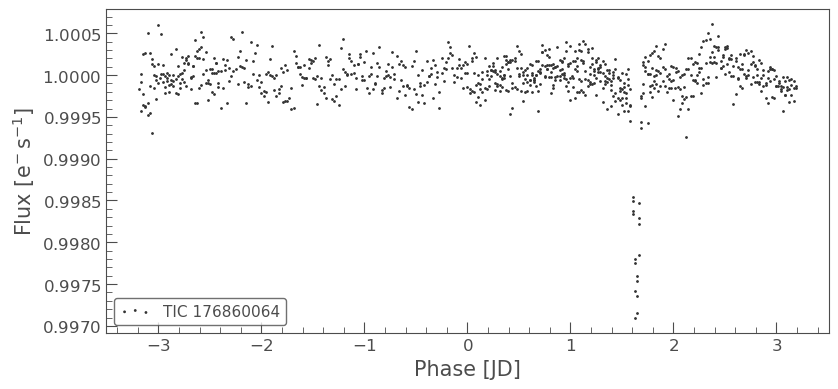

In [161]:
folded_lc, best_fit_period = pipeline_lightcurve(lc)
print(best_fit_period)
folded_lc.scatter()

In [162]:
folded_lc

time,flux,flux_err,time_original,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float64,float64,object,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
-3.1874984291480413,9.9983365e-01,6.0372451e-05,1767.9108776889213,4.2174230e-03,25941,1034.15070,1878.05437,2.2284355e+05,1.3384715e+01,3.6349885e+03,2.5099404e+00,2.3171703e+05,1.3991652e+01,0,nan,nan,nan,nan,1034.15070,5.6977369e-05,1878.05437,5.4621501e-05,-3.9871749e-02,1.0126228e-02
-3.1669208074563544,9.9956762e-01,6.0770265e-05,1787.056455310613,3.9700191e-03,26860,1034.20214,1878.09464,2.2312972e+05,1.3474777e+01,5.1785493e+03,2.7225447e+00,2.3168747e+05,1.4085799e+01,0,nan,nan,nan,nan,1034.20214,5.7704648e-05,1878.09464,5.5149801e-05,1.8397482e-02,5.6249026e-02
-3.1667787659071283,9.9991714e-01,6.0397326e-05,1780.6815973521623,4.1092946e-03,26554,1034.17318,1878.08372,2.2322967e+05,1.3393429e+01,3.6559705e+03,2.5064886e+00,2.3179173e+05,1.4000761e+01,0,nan,nan,nan,nan,1034.17318,5.7024296e-05,1878.08372,5.4504057e-05,-1.3544126e-02,4.3877281e-02
-3.16666515188786,1.0000075e+00,6.0361041e-05,1767.9317109661815,4.2173760e-03,25942,1034.15122,1878.05171,2.2281580e+05,1.3382183e+01,3.6354763e+03,2.5053210e+00,2.3175728e+05,1.3989006e+01,0,nan,nan,nan,nan,1034.15122,5.7001693e-05,1878.05171,5.4677948e-05,-3.9352778e-02,6.9574369e-03
-3.1460879986484764,9.9964091e-01,6.0795441e-05,1787.077288119421,3.9695036e-03,26861,1034.20345,1878.09357,2.2318725e+05,1.3480297e+01,5.2563188e+03,2.7293141e+00,2.3170339e+05,1.4091570e+01,0,nan,nan,nan,nan,1034.20345,5.7728164e-05,1878.09357,5.5109707e-05,1.9817401e-02,5.5219028e-02
-3.145945818333092,1.0002560e+00,6.0411546e-05,1780.7024302997363,4.1089179e-03,26555,1034.17266,1878.08308,2.2329953e+05,1.3396479e+01,3.6618398e+03,2.5064876e+00,2.3186850e+05,1.4003949e+01,0,nan,nan,nan,nan,1034.17266,5.7021862e-05,1878.08308,5.4493605e-05,-1.4454107e-02,4.3219987e-02
-3.145831874627225,9.9977503e-01,6.0355759e-05,1767.9525442434422,4.2173290e-03,25943,1034.15117,1878.05360,2.2278572e+05,1.3381116e+01,3.6391780e+03,2.5038691e+00,2.3170520e+05,1.3987890e+01,0,nan,nan,nan,nan,1034.15117,5.6982739e-05,1878.05360,5.4686618e-05,-3.9427139e-02,9.3763871e-03
-3.1252551903067123,9.9961784e-01,6.0814155e-05,1787.0981209277627,3.9689876e-03,26862,1034.20261,1878.09433,2.2315991e+05,1.3484384e+01,5.3366802e+03,2.7446802e+00,2.3169695e+05,1.4095841e+01,0,nan,nan,nan,nan,1034.20261,5.7757894e-05,1878.09433,5.5184380e-05,1.8956533e-02,5.6011420e-02


In [133]:
search_result = lk.search_lightcurve("176860064")
search_result

Could not resolve 176860064 to a sky position.


SearchResult containing 0 data products.

In [135]:
type(search_result)

lightkurve.search.SearchResult

In [134]:
# get index of data product with biggest Exposure time
exptime_max_idx = np.argmax(search_result.exptime)

# get data product
search_result[exptime_max_idx]

KeyError: 'exptime'

In [74]:
lc = search_result[0].download()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

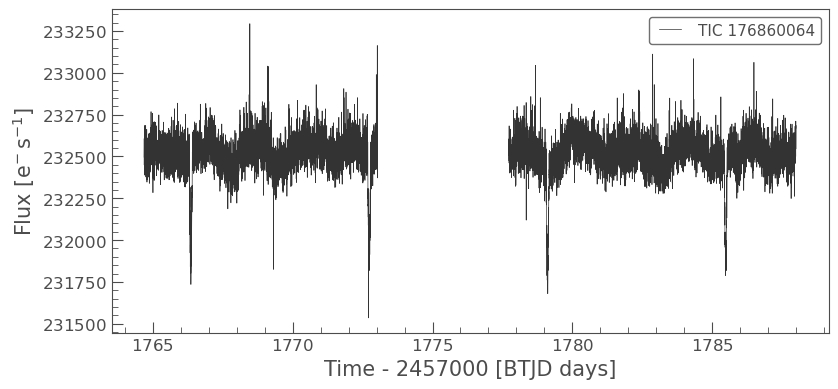

In [75]:
lc.plot()

In [76]:
lc = lc.remove_nans()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

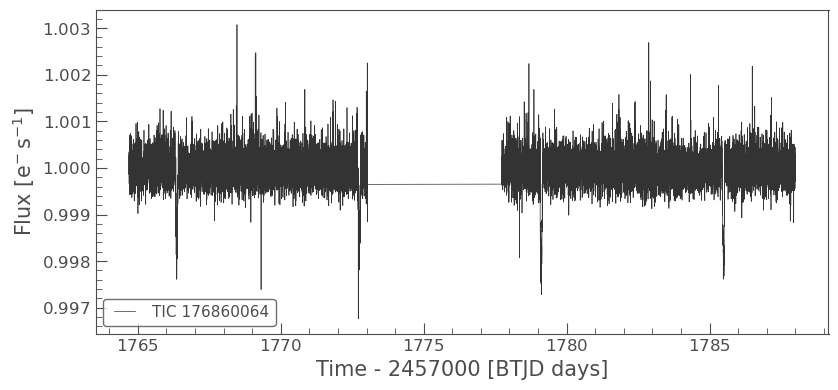

In [77]:
flat_lc = lc.flatten()
flat_lc.plot()

Best fit period:  6.37600 d


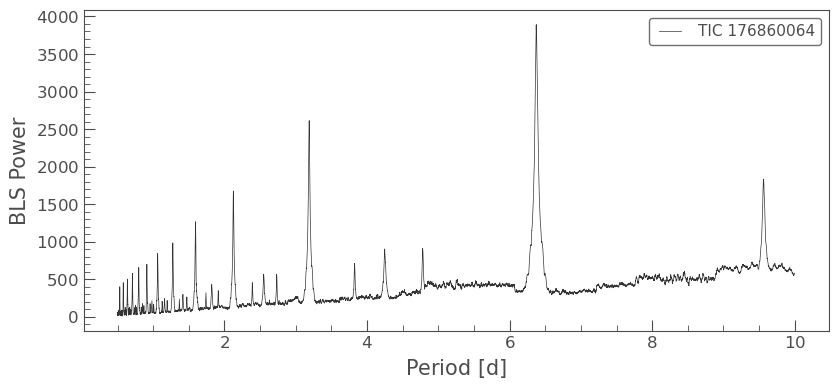

In [78]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.001))
periodogram.plot()
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

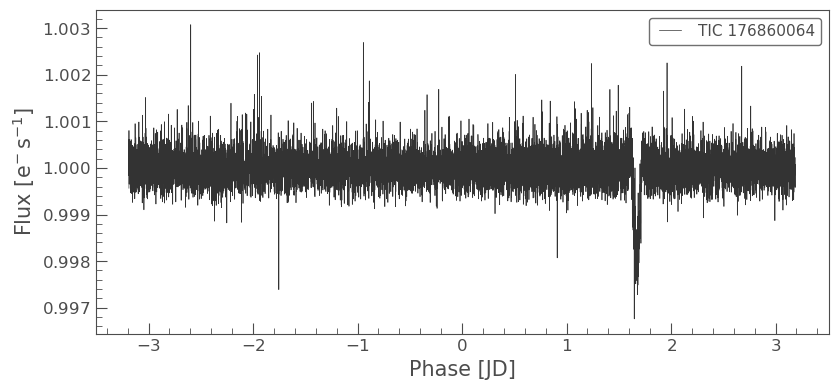

In [79]:
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

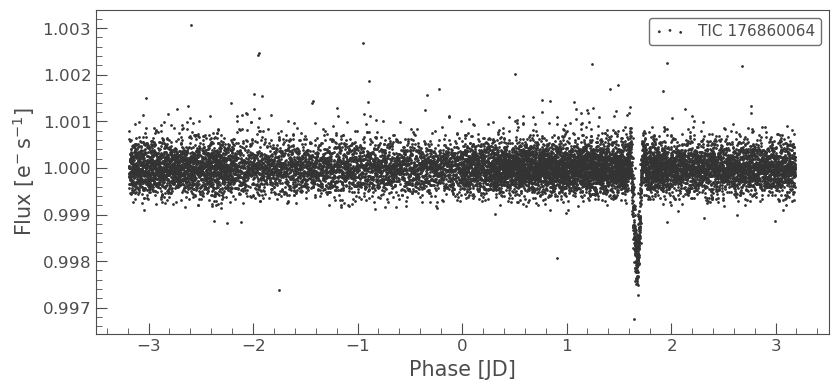

In [80]:
folded_lc.scatter()

In [82]:
folded_lc

time,flux,flux_err,time_original,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float64,float64,object,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
-3.187833124799309,9.9956487e-01,2.3455595e-04,1780.6288205490948,4.1102464e-03,398282,1034.17024,1878.08722,2.2346928e+05,5.2171177e+01,3.2035007e+03,1.1310242e+01,2.3240981e+05,5.4536835e+01,0,nan,nan,nan,nan,1034.17024,2.2062434e-04,1878.08722,2.1095382e-04,6.7971130e-03,3.3425365e-02
-3.187585959085139,1.0008024e+00,2.3624213e-04,1787.005067714809,3.9712898e-03,402873,1034.20315,1878.09816,2.2374558e+05,5.2541096e+01,4.5374575e+03,1.2216182e+01,2.3267483e+05,5.4923527e+01,0,nan,nan,nan,nan,1034.20315,2.2270830e-04,1878.09816,2.1310679e-04,4.2784017e-02,4.5417860e-02
-3.1871092302649506,1.0000321e+00,2.3450275e-04,1767.8775444436292,4.2174966e-03,389101,1034.15515,1878.05813,2.2328975e+05,5.2143433e+01,3.1567412e+03,1.1294289e+01,2.3244752e+05,5.4507832e+01,0,nan,nan,nan,nan,1034.15515,2.2020990e-04,1878.05813,2.1152681e-04,-1.0385533e-02,1.1420775e-03
-3.186444261192802,9.9983541e-01,2.3461988e-04,1780.6302094127013,4.1102218e-03,398283,1034.17044,1878.07165,2.2358584e+05,5.2185730e+01,3.1997288e+03,1.1334150e+01,2.3247420e+05,5.4552048e+01,0,nan,nan,nan,nan,1034.17044,2.2051625e-04,1878.07165,2.1091868e-04,7.5950720e-03,1.5569555e-02
-3.1861971047916287,9.9987404e-01,2.3628625e-04,1787.0064565691025,3.9712559e-03,402874,1034.20221,1878.09096,2.2366555e+05,5.2550957e+01,4.5635156e+03,1.2268889e+01,2.3245920e+05,5.4933834e+01,0,nan,nan,nan,nan,1034.20221,2.2284559e-04,1878.09096,2.1274059e-04,4.3157630e-02,3.6771569e-02
-3.185720345238706,1.0006104e+00,2.3468971e-04,1767.8789333286554,4.2174933e-03,389102,1034.14352,1878.05181,2.2344225e+05,5.2185085e+01,3.1566792e+03,1.1358616e+01,2.3258230e+05,5.4551373e+01,0,nan,nan,nan,nan,1034.14352,2.2048608e-04,1878.05181,2.1093983e-04,-2.3712251e-02,-7.4493405e-03
-3.1850553980510474,9.9965160e-01,2.3459123e-04,1780.631598275843,4.1101966e-03,398284,1034.17502,1878.08061,2.2349670e+05,5.2179523e+01,3.1922698e+03,1.1334818e+01,2.3243222e+05,5.4545563e+01,0,nan,nan,nan,nan,1034.17502,2.2080695e-04,1878.08061,2.1090680e-04,1.2925646e-02,2.5622902e-02
-3.184808250964011,9.9979714e-01,2.3624533e-04,1787.0078454229301,3.9712214e-03,402875,1034.20104,1878.09341,2.2360438e+05,5.2541744e+01,4.5644580e+03,1.2271736e+01,2.3244083e+05,5.4924202e+01,0,nan,nan,nan,nan,1034.20104,2.2288050e-04,1878.09341,2.1308502e-04,4.1319858e-02,3.9708678e-02


In [14]:
import pandas as pd
csv_path = "/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/Kepler/q1_q17_dr24_tce_2021.05.17_09.38.15.csv"
kepler_tce = pd.read_csv(csv_path, comment="#")
kepler_tce.head()

,kepid,tce_plnt_num,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_duration,tce_duration_err,av_training_set
0,1162345,2,0.831850,0.000067,132.227,0.035197,2.392,21.0000,AFP
1,1292087,2,1.095240,0.000010,132.133,0.002685,2.122,0.4755,UNK
2,1293031,2,0.719273,0.000014,132.227,0.002786,1.521,0.3183,UNK
3,1162345,3,0.831833,0.000009,131.919,0.002209,2.181,1.2110,AFP
4,1164109,1,622.408000,0.008547,162.256,0.009840,12.010,1.8430,UNK


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

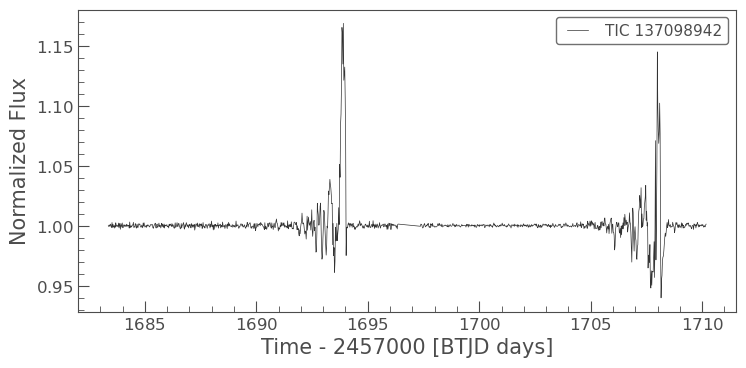

In [31]:
lc = download_lightcurve("1162345")
lc.plot()

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x153c79b20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x153873af0>]

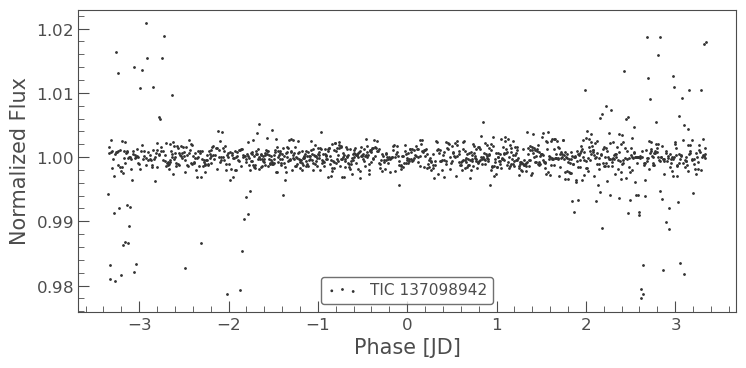

In [21]:
processed_lc, best_fit_period = pipeline_lightcurve(lc)
processed_lc.scatter()
path="/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/downloaded_lc/test.fits"
processed_lc.to_fits(path=path, overwrite=True)

In [32]:
lc.to_fits(path=path, overwrite=True)

AttributeError: object has no attribute centroid_col

In [22]:
lk.open("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/downloaded_lc/test.fits")


LightkurveError: Not recognized as a supported data product:
/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/downloaded_lc/test.fits
This file may be corrupt due to an interrupted download. Please remove it from your disk and try again.

In [26]:
from astropy.io import fits
hdu = fits.open('/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/downloaded_lc/test.fits')
type(hdu)

astropy.io.fits.hdu.hdulist.HDUList

In [1]:
path='/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/downloaded_lc/test.csv'
lc.to_pandas

NameError: name 'lc' is not defined

In [41]:
lc.to_pandas()

,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
time,,,,,,,,,,,,,,
1683.363533,0.999827,0.001248,21883,0.998024,0.999827,0.001248,4096,35,470.347992,549.252747,4793.609863,4781.959961,1.001070,0.999648
1683.384367,0.999437,0.001248,21884,0.996939,0.999437,0.001248,4096,35,470.350922,549.255676,4610.580078,4383.930176,1.000096,0.999566
1683.405200,1.000721,0.001248,21885,0.997612,1.000721,0.001248,4096,35,470.351074,549.257751,4760.890137,4632.220215,1.000727,1.000997
1683.426034,0.999484,0.001248,21886,0.995852,0.999484,0.001248,4096,35,470.350372,549.259583,5135.729980,4544.609863,0.999854,0.999082
1683.446868,1.000364,0.001248,21887,0.996279,1.000364,0.001248,4096,35,470.350220,549.260498,4955.810059,4285.430176,1.000121,1.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710.093161,1.000090,0.001248,23166,0.998509,1.000090,0.001248,0,36,470.360138,549.249146,366.410004,1064.510010,1.000119,1.000039
1710.113995,0.999150,0.001248,23167,0.997168,0.999150,0.001248,0,36,470.357971,549.250305,577.020020,1133.780029,0.999468,0.999052
1710.134828,0.999038,0.001248,23168,0.996603,0.999038,0.001248,0,36,470.356842,549.251831,784.530029,1275.239990,0.999166,0.998725


In [11]:
lc = lk.read("/Users/derrickvanfrausum/BeCode_AI/git-repos/astro/core/assets/data/Kepler/downloaded_lc/0112/011283615/kplr011283615-2013011073258_llc.fits")

In [12]:
print(lc.meta['TARGETID'])

11283615


In [16]:
kepler_tce.loc[kepler_tce.kepid == 11283615]

,kepid,tce_plnt_num,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_duration,tce_duration_err,av_training_set
18273,11283615,1,1.28959,0.000005,131.892,0.001084,1.392,0.1955,PC


In [45]:
kepler_tce.av_training_set.value_counts()

AFP    9596
UNK    4630
PC     3600
NTP    2541
Name: av_training_set, dtype: int64

* PC = planet candidate
* AFP = astrophysical false positive
* NTP = non-transiting phenomena
* UNK = unknown

In [89]:
# import os

# create empty DataFrame
df = pd.DataFrame(columns=['flux', 'kepid', 'best_fit_period', 'av_training_set'])

# get all light curve files in downloaded_lc folder
folder_path = os.path.abspath('assets/data/Kepler/downloaded_lc')

for path, dirs, files in os.walk(folder_path):
    for filename in files:
        filepath = os.path.join(path, filename)
        
        # read light curve file
        lc = lk.read(filepath)

        # preprocess light curve
        processed_lc, best_fit_period = pipeline_lightcurve(lc)

        # Convert into DataFrame
        lc_df = processed_lc.to_pandas()[["flux"]]

        # remove any missing values that would remain (normally removed during preprocessing)
        lc_df.dropna(inplace=True)

        # add target ID to dataframe
        lc_df["kepid"] = processed_lc.meta['TARGETID']

        # add best fit period to dataframe
        lc_df["best_fit_period"] = best_fit_period

        # merge dataframe with tce dataset (mainly to add classification variable)
        lc_df = lc_df.merge(kepler_tce[["kepid", "av_training_set"]], on="kepid")

        # append DataFrame to `df`DataFrame
        df = df.append(lc_df)

# check dataframe
df.head()

,flux,kepid,best_fit_period,av_training_set
0,1.000026,11241560,1.509,UNK
1,1.000465,11241560,1.509,UNK
2,0.999612,11241560,1.509,UNK
3,1.000569,11241560,1.509,UNK
4,0.999654,11241560,1.509,UNK


In [3]:
import numpy as np
a = [1,2,3,4,5,6,7,8,9,10]
splitted_list = np.array_split(a, 3)
for array in splitted_list:
    print(list(array))

[1, 2, 3, 4]
[5, 6, 7]
[8, 9, 10]
